<a href="https://colab.research.google.com/github/TanzimRusho/object_detection/blob/main/tensorflowhub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading modules

In [28]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading model directly from the website.

In [29]:
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

Loading image and transforming it to rgb tensor format

In [85]:
width = 800
height = 600

In [86]:
img_url = "/content/drive/MyDrive/coding projects/object_detection/tensorflowhub/elephant.jpg"
img = cv2.imread(img_url)
img = cv2.resize(img, (width, height))
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

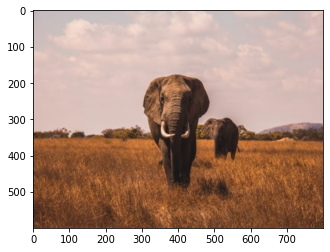

In [87]:
plt.imshow(rgb)

In [88]:
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)
rgb_tensor = tf.expand_dims(rgb_tensor, 0)
rgb_tensor

<tf.Tensor: shape=(1, 600, 800, 3), dtype=uint8, numpy=
array([[[[190, 178, 182],
         [190, 178, 182],
         [190, 178, 182],
         ...,
         [229, 195, 186],
         [228, 194, 185],
         [228, 194, 185]],

        [[190, 178, 182],
         [190, 178, 182],
         [190, 178, 182],
         ...,
         [229, 195, 186],
         [228, 194, 185],
         [227, 193, 184]],

        [[190, 178, 182],
         [190, 178, 182],
         [190, 178, 182],
         ...,
         [229, 195, 186],
         [227, 193, 184],
         [226, 192, 183]],

        ...,

        [[113,  68,  42],
         [110,  65,  41],
         [107,  62,  39],
         ...,
         [ 96,  51,  25],
         [108,  63,  36],
         [118,  72,  44]],

        [[116,  69,  41],
         [115,  68,  41],
         [113,  67,  42],
         ...,
         [ 86,  45,  21],
         [ 96,  55,  30],
         [103,  63,  37]],

        [[119,  70,  40],
         [118,  70,  42],
         [117,  70

In [89]:
label_path = "/content/drive/MyDrive/coding projects/object_detection/tensorflowhub/labels.csv"
label = pd.read_csv(label_path, sep=';', index_col='ID')
labels = label['OBJECT (2017 REL.)']
print(labels)

ID
1         person
2        bicycle
3            car
4     motorcycle
5       airplane
         ...    
87      scissors
88    teddy bear
89    hair drier
90    toothbrush
91             -
Name: OBJECT (2017 REL.), Length: 91, dtype: object


Detecting Objects

In [90]:
boxes, scores, classes, num_detection = detector(rgb_tensor)
num_detection

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([100], dtype=int32)>

In [91]:
pred_labels = classes.numpy().astype('int')[0]
pred_labels = [labels[i] for i in pred_labels]
pred_labels

['elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'bird',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'person',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'person',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'person',
 'person',
 'elephant',
 'elephant',
 'elephant',
 'elephant',
 'person',
 'elephant',
 'elephant',


In [92]:
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

Displaying on Image

In [93]:
for score, (ymin, xmin, ymax, xmax), label in zip(pred_scores, pred_boxes, 
                                                  pred_labels):
    if score < 0.5:
        continue

    img_boxes = cv2.rectangle(rgb, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label, (xmin, ymax-10), font, 1.5, (255,0,0), 2, 
                cv2.LINE_AA)
    score_txt = f"{100*round(score)}%"
    cv2.putText(img_boxes, score_txt, (xmin+20, ymax+10), font, 1, (0,0,255), 
                2, cv2.LINE_AA)

Showing Image

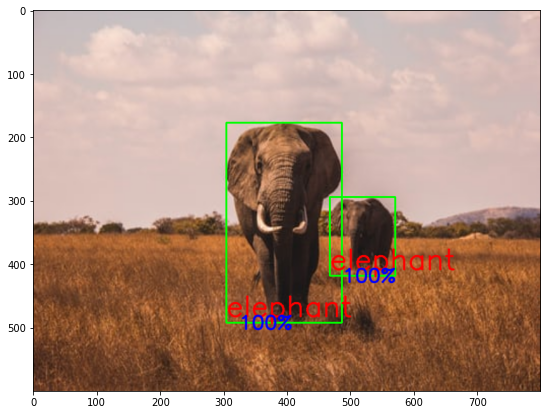

In [94]:
plt.figure(figsize=(15,7))
plt.imshow(img_boxes)